In [415]:
import pandas as pd
import matplotlib.pyplot as plt


TRADER_NAMES = ['Vinnie', 'Raj', 'Rhianna']

TRADER = 'Rhianna' #Set to one of the names above
PRODUCT = 'COCONUT' #Set to COCONUT or COCONUT_COUPON

# Read in trades data with names and create one big df
df1 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_4_day_1_wn.csv', sep=';')
df2 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_4_day_2_wn.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../../data/round-5-island-data-bottle/trades_round_4_day_3_wn.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
df = pd.concat([df1, df2, df3])
df_coconut = df.query('symbol=="COCONUT"')
df_coconut_coupon = df.query('symbol=="COCONUT_COUPON"')

# Read in prices data and create one big df
df1 = pd.read_csv('../../../data/round-4-island-data-bottle/prices_round_4_day_1.csv', sep=';')
df2 = pd.read_csv('../../../data/round-4-island-data-bottle/prices_round_4_day_2.csv', sep=';')
df2['timestamp'] = df2['timestamp'] + 1000000
df3 = pd.read_csv('../../../data/round-4-island-data-bottle/prices_round_4_day_3.csv', sep=';')
df3['timestamp'] = df3['timestamp'] + 2000000
prices = pd.concat([df1, df2, df3])
prices_coconut = prices.query('product=="COCONUT"')
prices_coconut_coupon = prices.query('product=="COCONUT_COUPON"')

In [416]:
df_coconut_coupon_valentina = df_coconut_coupon.query('buyer=="Valentina" or seller=="Valentina"')
df_coconut_valentina = df_coconut.query('buyer=="Valentina" or seller=="Valentina"')
df_coconut_coupon_valentina_self = df_coconut_coupon_valentina.query('buyer==seller')
df_coconut_valentina_self = df_coconut_valentina.query('buyer==seller')

In [417]:
df_coconut_coupon_vinnie = df_coconut_coupon.query('buyer=="Vinnie" or seller=="Vinnie"')
df_coconut_vinnie = df_coconut.query('buyer=="Vinnie" or seller=="Vinnie"')
df_coconut_coupon_vinnie_self = df_coconut_coupon_vinnie.query('buyer==seller')
df_coconut_vinnie_self = df_coconut_vinnie.query('buyer==seller')

In [418]:
df_coconut_rhianna = df_coconut.query('buyer=="Rhianna" or seller=="Rhianna"')
df_coconut_coupon_rhianna = df_coconut_coupon.query('buyer=="Rhianna" or seller=="Rhianna"')    
df_coconut_rhianna_self = df_coconut_rhianna.query('buyer==seller')
df_coconut_coupon_rhianna_self = df_coconut_coupon_rhianna.query('buyer==seller')

In [419]:
df_coconut_coupon_raj = df_coconut_coupon.query('buyer=="Raj" or seller=="Raj"')
df_coconut_raj = df_coconut.query('buyer=="Raj" or seller=="Raj"')
df_coconut_coupon_raj_self = df_coconut_coupon_raj.query('buyer==seller')
df_coconut_raj_self = df_coconut_raj.query('buyer==seller')

In [420]:
# calculate profit for the trader
def calculate_cashflow_per_transaction(row):
    if row['buyer'] == TRADER and row['seller'] != TRADER:
        return -row['quantity'] * row['price']
    elif row['buyer'] != TRADER and row['seller'] == TRADER:
        return row['quantity'] * row['price']
    else:
        return 0
    
def calculate_position_change(row):
    if row['buyer'] == TRADER and row['seller'] != TRADER:
        return row['quantity']
    elif row['buyer'] != TRADER and row['seller'] == TRADER:
        return -row['quantity']
    else:
        return 0
    
def calculate_total_profit_per_day(dataframe, price_dataframe, day=1):
    if day == 1:
        dataframe = dataframe.query('timestamp <= 1000000').copy()
    elif day == 2:
        dataframe = dataframe.query('timestamp <= 2000000 and timestamp > 1000000').copy()
    else:
        dataframe = dataframe.query('timestamp < 3000000 and timestamp > 2000000').copy()
    dataframe['cashflows'] = dataframe.apply(calculate_cashflow_per_transaction, axis=1)
    dataframe['position_change'] = dataframe.apply(calculate_position_change, axis=1)
    end_of_period_position = dataframe['position_change'].sum()
    end_of_period_mid_price = price_dataframe.query('timestamp==@day*1000000')['mid_price'].values[0] if day <= 2 else price_dataframe.iloc[-1]['mid_price']
    print(f'End of period mid price on day {day}: {end_of_period_mid_price}')
    end_of_period_cash = end_of_period_position * end_of_period_mid_price
    return end_of_period_cash + dataframe['cashflows'].sum()

def calculate_total_profit(dataframe, price_dataframe):
    profit_1 = calculate_total_profit_per_day(dataframe, price_dataframe, 1)
    profit_2 = calculate_total_profit_per_day(dataframe, price_dataframe, 2)
    profit_3 = calculate_total_profit_per_day(dataframe, price_dataframe, 3)
    return profit_1 + profit_2 + profit_3

In [421]:
TRADER = 'Vinnie'
total_profit_coconut = calculate_total_profit(df_coconut_vinnie, prices_coconut)
print(f'{TRADER}s total coconut profit: {total_profit_coconut}')

total_profit_coconut_coupon = calculate_total_profit(df_coconut_coupon_vinnie, prices_coconut_coupon)
print(f'{TRADER}s total coconut coupon profit: {total_profit_coconut_coupon}')

End of period mid price on day 1: 10135.5
End of period mid price on day 2: 9991.0
End of period mid price on day 3: 9882.5
Vinnies total coconut profit: -2522.0
End of period mid price on day 1: 682.5
End of period mid price on day 2: 620.0
End of period mid price on day 3: 575.5
Vinnies total coconut coupon profit: 206573.0


In [422]:
TRADER = 'Valentina'
total_profit_coconuts = calculate_total_profit(df_coconut_valentina, prices_coconut)
print(f'{TRADER}s total coconut profit: {total_profit_coconuts}')

total_profit_coconut_coupons = calculate_total_profit(df_coconut_coupon_valentina, prices_coconut_coupon)
print(f'{TRADER}s total coconut coupon profit: {total_profit_coconut_coupons}')

End of period mid price on day 1: 10135.5
End of period mid price on day 2: 9991.0
End of period mid price on day 3: 9882.5
Valentinas total coconut profit: 0.0
End of period mid price on day 1: 682.5
End of period mid price on day 2: 620.0
End of period mid price on day 3: 575.5
Valentinas total coconut coupon profit: -280459.5


In [423]:
TRADER = 'Rhianna'
total_profit_coconuts = calculate_total_profit(df_coconut_rhianna, prices_coconut)
print(f'{TRADER}s total coconut profit: {total_profit_coconuts}')

total_profit_coconut_coupons = calculate_total_profit(df_coconut_coupon_rhianna, prices_coconut_coupon)
print(f'{TRADER}s total coconut coupon profit: {total_profit_coconut_coupons}')

End of period mid price on day 1: 10135.5
End of period mid price on day 2: 9991.0
End of period mid price on day 3: 9882.5
Rhiannas total coconut profit: 472.5
End of period mid price on day 1: 682.5
End of period mid price on day 2: 620.0
End of period mid price on day 3: 575.5
Rhiannas total coconut coupon profit: 45952.5


In [424]:
TRADER = 'Raj'
total_profit_coconuts = calculate_total_profit(df_coconut_raj, prices_coconut)
print(f'{TRADER}s total coconut profit: {total_profit_coconuts}')

total_profit_coconut_coupons = calculate_total_profit(df_coconut_coupon_raj, prices_coconut_coupon)
print(f'{TRADER}s total coconut coupon profit: {total_profit_coconut_coupons}')


End of period mid price on day 1: 10135.5
End of period mid price on day 2: 9991.0
End of period mid price on day 3: 9882.5
Rajs total coconut profit: 2049.5
End of period mid price on day 1: 682.5
End of period mid price on day 2: 620.0
End of period mid price on day 3: 575.5
Rajs total coconut coupon profit: 0.0


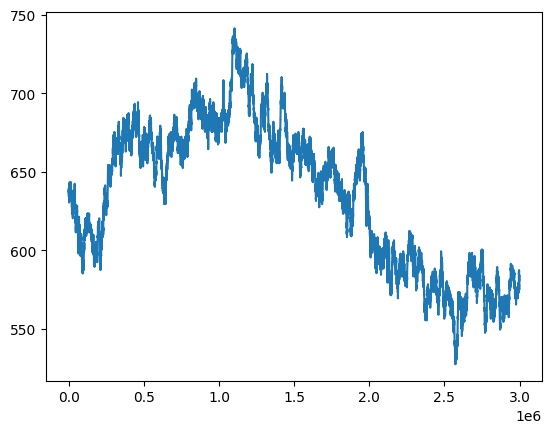

In [425]:
#plot coconut coupon mid prices
plt.plot(prices_coconut_coupon['timestamp'], prices_coconut_coupon['mid_price'])

In [ ]:
return_estimates = {
    "refrigerators": 1.02,
      #bubble potential
}